In [11]:
# Import TensorFlow
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [13]:
# Download and prepare the CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images=train_images.reshape(50000, 32, 32, 3)
train_images=train_images / 255.0
test_images = test_images.reshape(10000, 32, 32, 3)
test_images=test_images/255.0


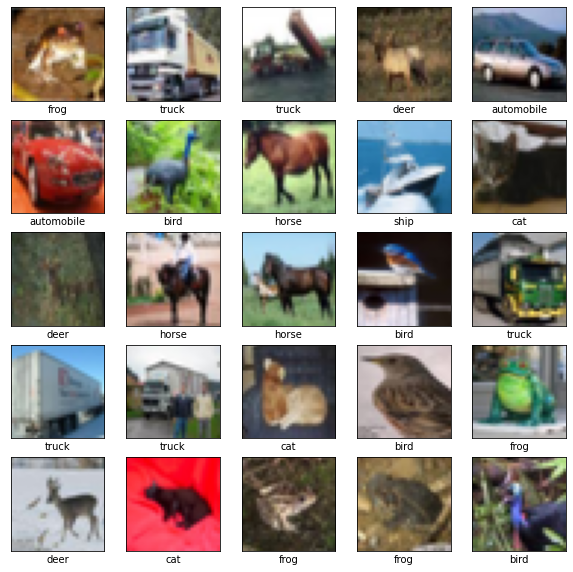

In [14]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [15]:
# Create the convolutional 
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 32x32 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               1180160   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)              

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 11s 7ms/step - loss: 2.0587 - accuracy: 0.3959 - val_loss: 1.9616 - val_accuracy: 0.4990
Epoch 2/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.9314 - accuracy: 0.5279 - val_loss: 1.8823 - val_accuracy: 0.5778
Epoch 3/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.8788 - accuracy: 0.5799 - val_loss: 1.8951 - val_accuracy: 0.5633
Epoch 4/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.8422 - accuracy: 0.6172 - val_loss: 1.8396 - val_accuracy: 0.6204
Epoch 5/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.8174 - accuracy: 0.6429 - val_loss: 1.8470 - val_accuracy: 0.6108
Epoch 6/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.7920 - accuracy: 0.6684 - val_loss: 1.8124 - val_accuracy: 0.6468
Epoch 7/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.7778 - accuracy: 0.6830 - val_loss: 1.8099 - val_ac

313/313 - 1s - loss: 1.7709 - accuracy: 0.6879


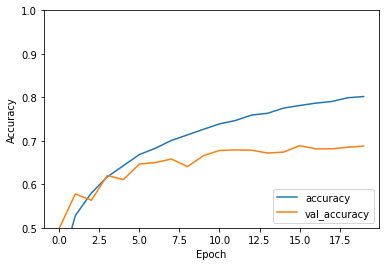

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [75]:
# Make predictions
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
predictions = model.predict(test_images)
print(test_acc)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  
  plt.xlabel("{} ".format(class_names[predicted_label]),)

313/313 - 1s - loss: 1.7709 - accuracy: 0.6879
0.6879000067710876


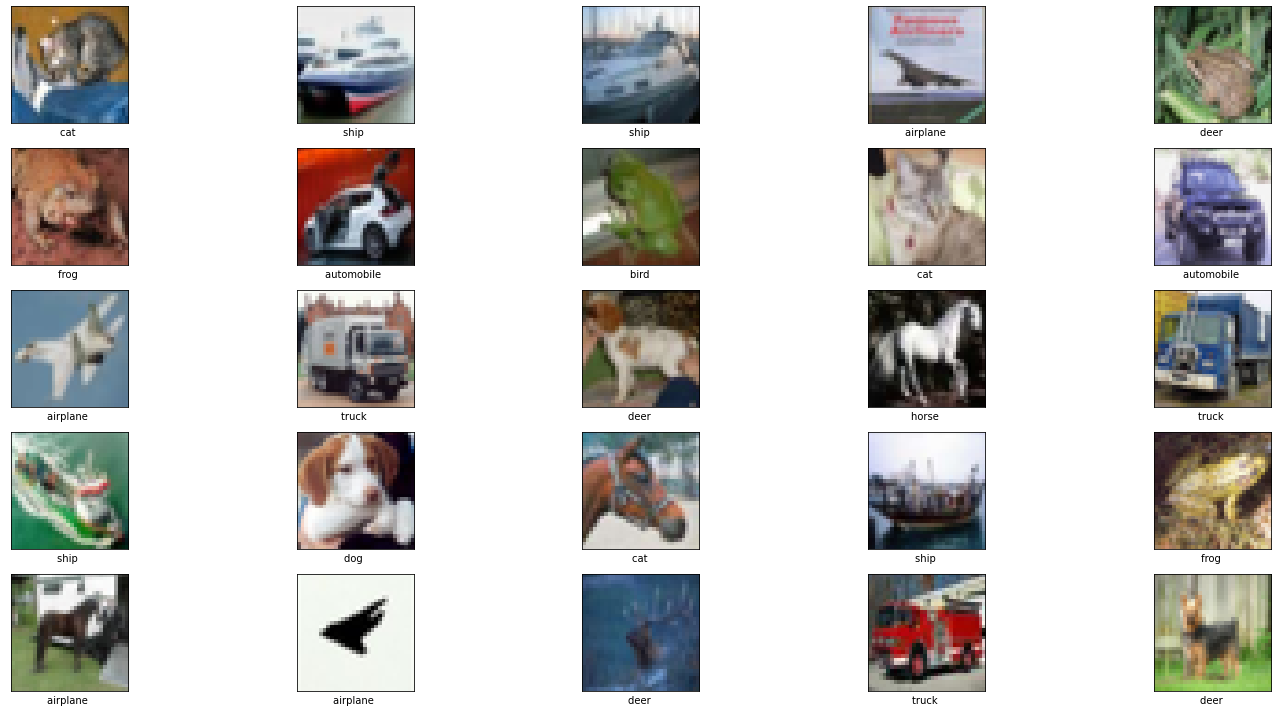

In [76]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  # plt.subplot(num_rows, 2*num_cols, 2*i+2)
  # plot_value_array(i, predictions[i], test_label)
plt.tight_layout()
plt.show()